## **Test technique**
### **description du [Dataset](https://opendata.paris.fr/explore/dataset/recrutement-sur-concours-bilan-social/information/?disjunctive.collectivite&disjunctive.categorie&disjunctive.concours&disjunctive.nature_du_concours&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6InJlY3J1dGVtZW50LXN1ci1jb25jb3Vycy1iaWxhbi1zb2NpYWwiLCJvcHRpb25zIjp7ImRpc2p1bmN0aXZlLmNvbGxlY3Rpdml0ZSI6dHJ1ZSwiZGlzanVuY3RpdmUuY2F0ZWdvcmllIjp0cnVlLCJkaXNqdW5jdGl2ZS5jb25jb3VycyI6dHJ1ZSwiZGlzanVuY3RpdmUubmF0dXJlX2R1X2NvbmNvdXJzIjp0cnVlfX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImxpbmUiLCJmdW5jIjoiQVZHIiwieUF4aXMiOiJub21icmVfZGVfcG9zdGVzIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiIzA3MUYzMiJ9XSwieEF4aXMiOiJhbm5lZSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6InllYXIiLCJzb3J0IjoiIn1dLCJkaXNwbGF5TGVnZW5kIjp0cnVlLCJhbGlnbk1vbnRoIjp0cnVlfQ%3D%3D&sort=-admis_liste_principale_hommes)**
#### elle concerne le recrutement de fonctionnaires par concours à la Ville de Paris, avec des détails sur les inscriptions, présences, et réussites par sexe dans différentes catégories et filières métiers. Il fait partie du bilan social annuel de la Ville, couvrant les ressources humaines, incluant effectifs, rémunérations, conditions de travail, et formations.
### colonnes:
- annee
- collectivite
- categorie
- filiere
- concours
- nature_du_concours
- nombre_de_postes
- inscrits_hommes
- inscrits_femmes
- total_inscrits
- total_des_presents
- admis_liste_principale_hommes
- admis_liste_principale_femmes
- total_admis_liste_principale
- admis_liste_complementaire_hommes
- admis_liste_complementaire_femmes
- total_admis_liste_complementaire
- hommes_liste_principale_liste_complementaire
- femmes_liste_principale_liste_complementaire
- total_des_admis_liste_principale_liste_complementaire


### **importation des biblios necessaires**


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **recuperation des donnés**

recuperation sous forme de boucle avec une limite= 100(nombre d'enregistrement par requete)

In [ ]:
api_url = "https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/recrutement-sur-concours-bilan-social/records"
all_data = []

# Paramètres
limit = 100
offset = 0

while True:
    try:
        params = {'limit': limit, 'offset': offset}
        response = requests.get(api_url, params=params)

        if response.status_code == 200:
            json_data = response.json()

            if 'results' in json_data:
                data = json_data['results']
                all_data.extend(data)
                offset += limit
                print(f"Récupération des données {offset} sur {json_data['total_count']}...")
                if offset >= json_data['total_count']:
                    break
            else:
                print("Clé 'results' introuvable dans la réponse JSON.")
                break
        else:
            print(f"Erreur lors de la récupération des données: {response.status_code}")
            print(response.text)
            break

    except requests.exceptions.RequestException as e:
        print(f"Erreur de connexion : {e}")
        break

df = pd.DataFrame(all_data)
print("Nombre total d'enregistrements récupérés" ,len(df))


Récupération des données 100 sur 549...
Récupération des données 200 sur 549...
Récupération des données 300 sur 549...
Récupération des données 400 sur 549...
Récupération des données 500 sur 549...
Récupération des données 600 sur 549...
Nombre total d'enregistrements récupérés 549


In [ ]:
df


,annee,collectivite,categorie,filiere,concours,nature_du_concours,nombre_de_postes,inscrits_hommes,inscrits_femmes,total_inscrits,...,total_des_presents,admis_liste_principale_hommes,admis_liste_principale_femmes,total_admis_liste_principale,admis_liste_complementaire_hommes,admis_liste_complementaire_femmes,total_admis_liste_complementaire,hommes_liste_principale_liste_complementaire,femmes_liste_principale_liste_complementaire,total_des_admis_liste_principale_liste_complementaire
0,2015,commune,C,animation,"Adjoint d'animation et d'action sportive, acti...",Externexterne,65.0,292.0,592.0,884.0,...,496.0,24.0,41.0,65,3.0,11.0,14,27.0,52.0,79.0
1,2015,commune,A,culturelle,Professeur de la Ville de Paris - Education mu...,Externexterne,8.0,41.0,87.0,128.0,...,55.0,2.0,6.0,8,1.0,4.0,5,3.0,10.0,13.0
2,2015,commune,B,technique,Technicien des Services Opérationnels - nettoi...,Internenterne,13.0,361.0,30.0,391.0,...,260.0,14.0,1.0,15,1.0,0.0,1,15.0,1.0,16.0
3,2015,commune,B,technique,Technicien Supérieur Principal - laboratoires,Externexterne,10.0,45.0,67.0,112.0,...,101.0,2.0,8.0,10,0.0,8.0,8,2.0,16.0,18.0
4,2016,commune,C,technique,Adjoint Technique 1ère cl - Maintenance des bâ...,Externexterne,5.0,310.0,2.0,312.0,...,124.0,5.0,0.0,5,6.0,0.0,6,11.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,2021,VILLE DE PARIS,A,technique,EIVP,Internenterne,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,0,NaN,NaN,0,1.0,1.0,2.0
545,2022,VILLE DE PARIS,A,culturelle,Maitre de conférence ESPCI,ExterneXTExterneRNExterne,1.0,7.0,5.0,12.0,...,12.0,NaN,NaN,0,NaN,NaN,0,2.0,1.0,3.0
546,2022,VILLE DE PARIS,B,technique,Agent de maîtrise électro,InterneNTExterneRNExterne,9.0,36.0,0.0,36.0,...,29.0,NaN,NaN,0,NaN,NaN,0,3.0,0.0,3.0
547,2022,VILLE DE PARIS,B,culturelle,Educateur activités physiques et sportives nat...,InterneNTExterneRNExterne,8.0,11.0,4.0,15.0,...,14.0,NaN,NaN,0,NaN,NaN,0,7.0,1.0,8.0


### **telechargement des données sous forme d'1 csv file**



In [ ]:

df.to_csv('recrutement.csv', index=False)

print("Données sauvegardées dans 'recrutement.csv'.")


Données sauvegardées dans 'recrutement.csv'.


## **Traitement du données**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   annee                                                  549 non-null    object 
 1   collectivite                                           549 non-null    object 
 2   categorie                                              549 non-null    object 
 3   filiere                                                549 non-null    object 
 4   concours                                               549 non-null    object 
 5   nature_du_concours                                     549 non-null    object 
 6   nombre_de_postes                                       343 non-null    float64
 7   inscrits_hommes                                        547 non-null    float64
 8   inscrits_femmes                                   

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

annee                                                      0
collectivite                                               0
categorie                                                  0
filiere                                                    0
concours                                                   0
nature_du_concours                                         0
nombre_de_postes                                         206
inscrits_hommes                                            2
inscrits_femmes                                            2
total_inscrits                                             2
presents_hommes                                            2
presents_femmes                                            2
total_des_presents                                         2
admis_liste_principale_hommes                            247
admis_liste_principale_femmes                            247
total_admis_liste_principale                               0
admis_liste_complementai

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isna().sum()


annee                                                    0
collectivite                                             0
categorie                                                0
filiere                                                  0
concours                                                 0
nature_du_concours                                       0
nombre_de_postes                                         0
inscrits_hommes                                          0
inscrits_femmes                                          0
total_inscrits                                           0
presents_hommes                                          0
presents_femmes                                          0
total_des_presents                                       0
admis_liste_principale_hommes                            0
admis_liste_principale_femmes                            0
total_admis_liste_principale                             0
admis_liste_complementaire_hommes                       

In [ ]:
columnsobj=df.select_dtypes('object').columns
columnsobj

Index(['annee', 'collectivite', 'categorie', 'filiere', 'concours',
       'nature_du_concours'],
      dtype='object')

In [ ]:
df['annee'].value_counts()

annee
2019    85
2015    83
2016    76
2020    75
2021    74
2018    72
2017    43
2022    41
Name: count, dtype: int64

In [ ]:
df['collectivite'].value_counts()

collectivite
VILLE DE PARIS    349
commune           200
Name: count, dtype: int64

In [ ]:
df['categorie'].value_counts()

categorie
B    250
A    162
C    137
Name: count, dtype: int64

In [ ]:
df['filiere'].value_counts()

filiere
technique         294
culturelle         87
médico-sociale     58
administrative     27
sécurité           26
sociale            21
sportive           20
animation          16
Name: count, dtype: int64

In [ ]:
df['concours'].value_counts()

concours
Secrétaire administratif                                                                 14
Technicien Supérieur Principal - génie urbain                                            14
Technicien Supérieur Principal - construction et bâtiment                                12
Educateur des Activités Physiques et Sportives Activités Aquatiques et de la Natation    12
Attaché                                                                                  11
                                                                                         ..
Adjoint Technique 1ère cl - maintenance de la voie publique                               1
Professeur de la Ville de Paris -  Arts plastiques                                        1
Professeur de conservatoire  - danse jazz                                                 1
Orthophoniste                                                                             1
Agent·de maîtrise Maintenance Automobile                               

In [ ]:
df['nature_du_concours'].value_counts()

nature_du_concours
Externexterne                317
Internenterne                187
ExterneXTExterneRNExterne     24
InterneNTExterneRNExterne     16
3ème concours                  5
Name: count, dtype: int64

il ya une anomalie au niveau du nature du concours , il existe seulement 3 types : externe , interne , 3 eme concours et il se peut avoir externe + interne .

In [ ]:


def corriger_concours(val):
    corrections = {
        'Externexterne': 'Externe',
        'Internenterne': 'Interne',
        'ExterneXTExterneRNExterne': 'Externe',
        'InterneNTExterneRNExterne': 'Interne + externe',
        '3ème concours': '3ème concours',
        'Externe': 'Externe',
        'Interne': 'Interne'
    }
    return corrections.get(val, val)

df['nature_du_concours_corrige'] = df['nature_du_concours'].apply(corriger_concours)
df[['nature_du_concours']]=df[['nature_du_concours_corrige']]
df['nature_du_concours'].value_counts()

nature_du_concours
Externe              341
Interne              187
Interne + externe     16
3ème concours          5
Name: count, dtype: int64

## **Data viz**

On doit tenir compte de l'équité entre les genres et les collectivités au fil des années pour différents types de concours. En analysant les données, j'ai observé que les colonnes mettent en évidence la distribution des inscriptions et des réussites en fonction du genre, ce qui pourrait être lié aux catégories des concours. Le taux de réussite, influencé par le genre et le type de concours, pourrait indiquer une disparité de traitement. Ainsi, il est crucial d'examiner s'il existe une préférence pour un genre particulier et de déterminer si cette disparité est associée aux collectivités

**1-Rrepartition des inscrits au fils des années**

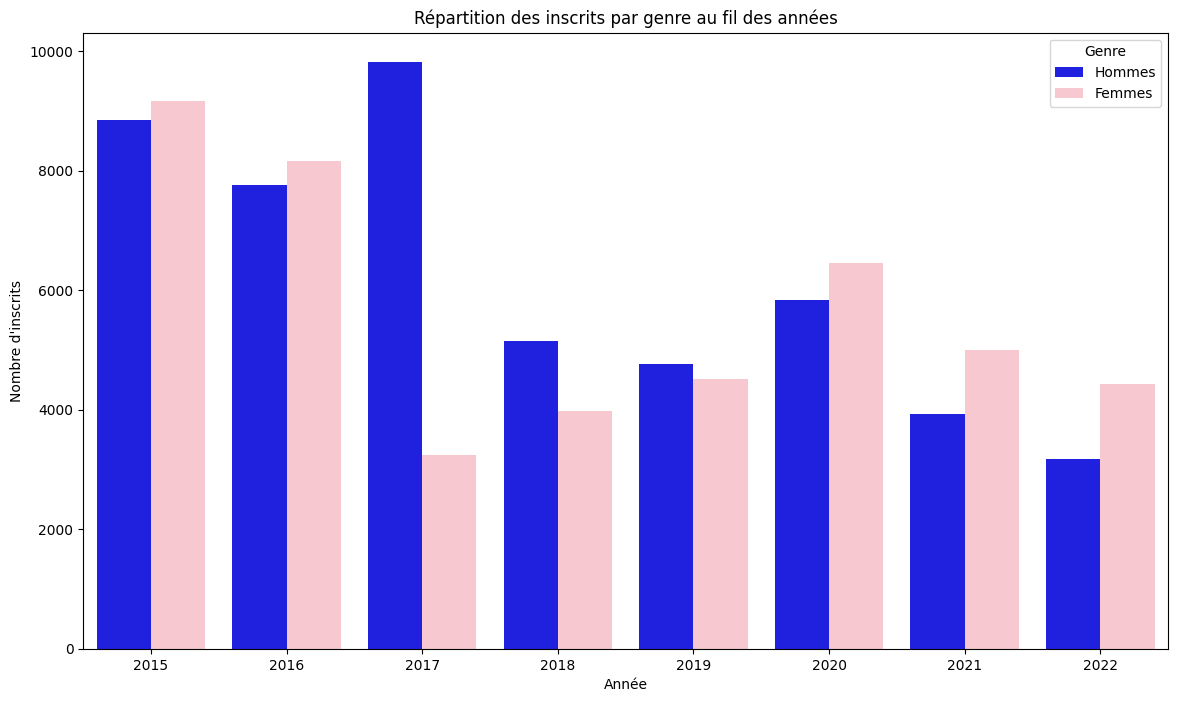

In [ ]:
df_grouped = df.groupby('annee')[['inscrits_hommes', 'inscrits_femmes']].sum().reset_index()

df_melted = df_grouped.melt(id_vars=['annee'], value_vars=['inscrits_hommes', 'inscrits_femmes'],
                            var_name='sexe', value_name='inscrits')

df_melted['sexe'] = df_melted['sexe'].replace({'inscrits_hommes': 'Hommes', 'inscrits_femmes': 'Femmes'})

plt.figure(figsize=(14, 8))
sns.set_palette("muted")
bar_plot = sns.barplot(x='annee', y='inscrits', hue='sexe', data=df_melted, palette={'Hommes': 'blue', 'Femmes': 'pink'})
plt.title('Répartition des inscrits par genre au fil des années')
plt.xlabel('Année')
plt.ylabel('Nombre d\'inscrits')
plt.legend(title='Genre')
plt.show()

on remarque que :


*  Le nombre total d'inscrits a augmenté de manière constante de 2015 à 2022.
*  La proportion d'inscrits de sexe masculin a diminué de 2015 à 2022, tandis que la proportion d'inscrits de sexe féminin a augmenté.
*  En 2022, la proportion d'inscrits de sexe féminin était légèrement supérieure à celle des inscrits de sexe masculin.

**2-Répartition des admis par genre au fil des années**

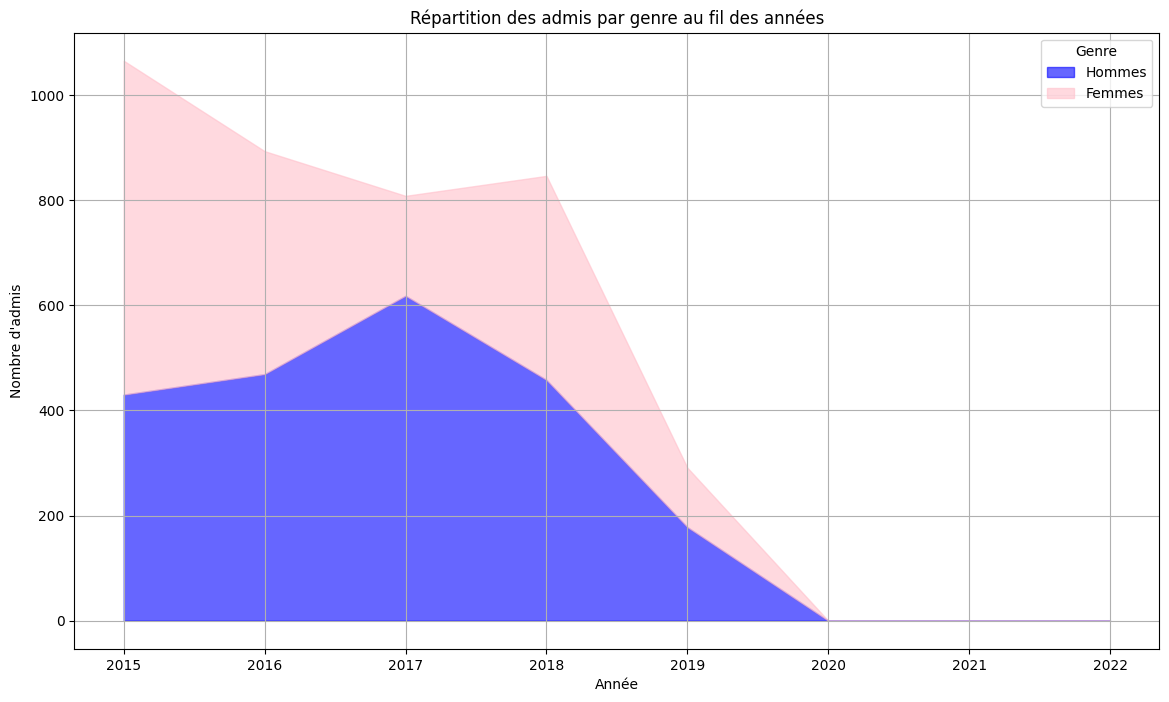

In [ ]:

df['total_admis_hommes'] = df['admis_liste_principale_hommes'] + df['admis_liste_complementaire_hommes']
df['total_admis_femmes'] = df['admis_liste_principale_femmes'] + df['admis_liste_complementaire_femmes']
df_grouped = df.groupby('annee')[['total_admis_hommes', 'total_admis_femmes']].sum().reset_index()

years = df_grouped['annee']
hommes = df_grouped['total_admis_hommes']
femmes = df_grouped['total_admis_femmes']
plt.figure(figsize=(14, 8))
plt.fill_between(years, hommes, label='Hommes', color='blue', alpha=0.6)
plt.fill_between(years, hommes + femmes, hommes, label='Femmes', color='pink', alpha=0.6)

plt.title('Répartition des admis par genre au fil des années')
plt.xlabel('Année')
plt.ylabel('Nombre d\'admis')
plt.legend(title='Genre')

plt.grid(True)
plt.show()


le taux du reussite des femmes est toujours >= taux du reussite des hommes .
0 reussites depuis 2020

In [ ]:

df_recent_years = df[df['annee'].isin(['2020', '2021', '2022'])]
df_recent_years['admis_liste_principale_hommes']
admission_columns = [
    'admis_liste_principale_hommes',
    'admis_liste_principale_femmes',
    'admis_liste_complementaire_hommes',
    'admis_liste_complementaire_femmes'
]
df_recent_years[admission_columns]




,admis_liste_principale_hommes,admis_liste_principale_femmes,admis_liste_complementaire_hommes,admis_liste_complementaire_femmes
16,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0
...,...,...,...,...
544,0.0,0.0,0.0,0.0
545,0.0,0.0,0.0,0.0
546,0.0,0.0,0.0,0.0
547,0.0,0.0,0.0,0.0


**3- Répartition des inscriptions/admis par genre et par catégorie de**
concours**

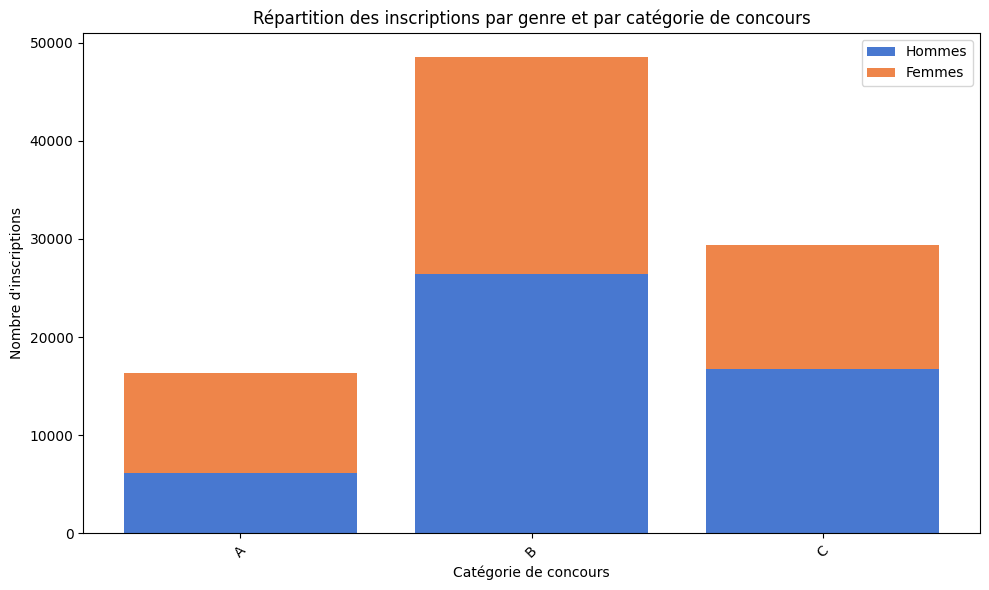

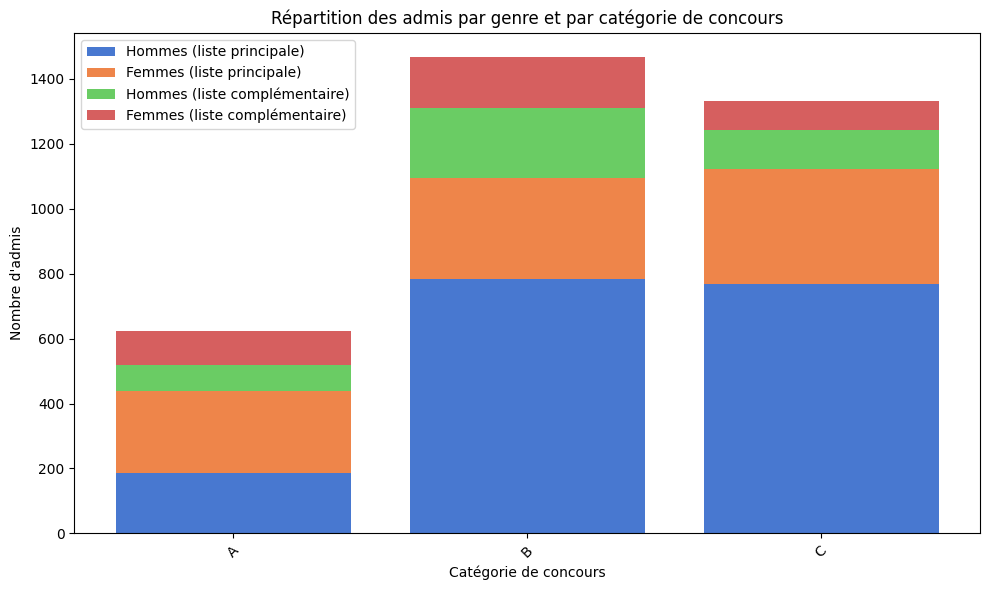

In [ ]:
group_by_category = df.groupby('categorie').sum()
plt.figure(figsize=(10, 6))
plt.bar(group_by_category.index, group_by_category['inscrits_hommes'], label='Hommes')
plt.bar(group_by_category.index, group_by_category['inscrits_femmes'], bottom=group_by_category['inscrits_hommes'], label='Femmes')
plt.xlabel('Catégorie de concours')
plt.ylabel('Nombre d\'inscriptions')
plt.title('Répartition des inscriptions par genre et par catégorie de concours')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# admis
plt.figure(figsize=(10, 6))
plt.bar(group_by_category.index, group_by_category['admis_liste_principale_hommes'], label='Hommes (liste principale)')
plt.bar(group_by_category.index, group_by_category['admis_liste_principale_femmes'], bottom=group_by_category['admis_liste_principale_hommes'], label='Femmes (liste principale)')
plt.bar(group_by_category.index, group_by_category['admis_liste_complementaire_hommes'], bottom=group_by_category['total_admis_liste_principale'], label='Hommes (liste complémentaire)')
plt.bar(group_by_category.index, group_by_category['admis_liste_complementaire_femmes'], bottom=group_by_category['total_admis_liste_principale'] + group_by_category['admis_liste_complementaire_hommes'], label='Femmes (liste complémentaire)')
plt.xlabel('Catégorie de concours')
plt.ylabel('Nombre d\'admis')
plt.title('Répartition des admis par genre et par catégorie de concours')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




*   Le nombre d'inscriptions varie considérablement d'une catégorie de concours à l'autre.
*   En général, les femmes sont plus nombreuses à s'inscrire aux concours de la catégorie A, tandis que les hommes sont plus nombreux à s'inscrire aux concours des catégories B et C.
*  En général, les femmes sont plus admises aux concours de la catégorie A, tandis que les hommes dominent les admissions dans les catégories B et C.



**4-Relation entre la catégorie de concours et le taux de réussite par sexe**

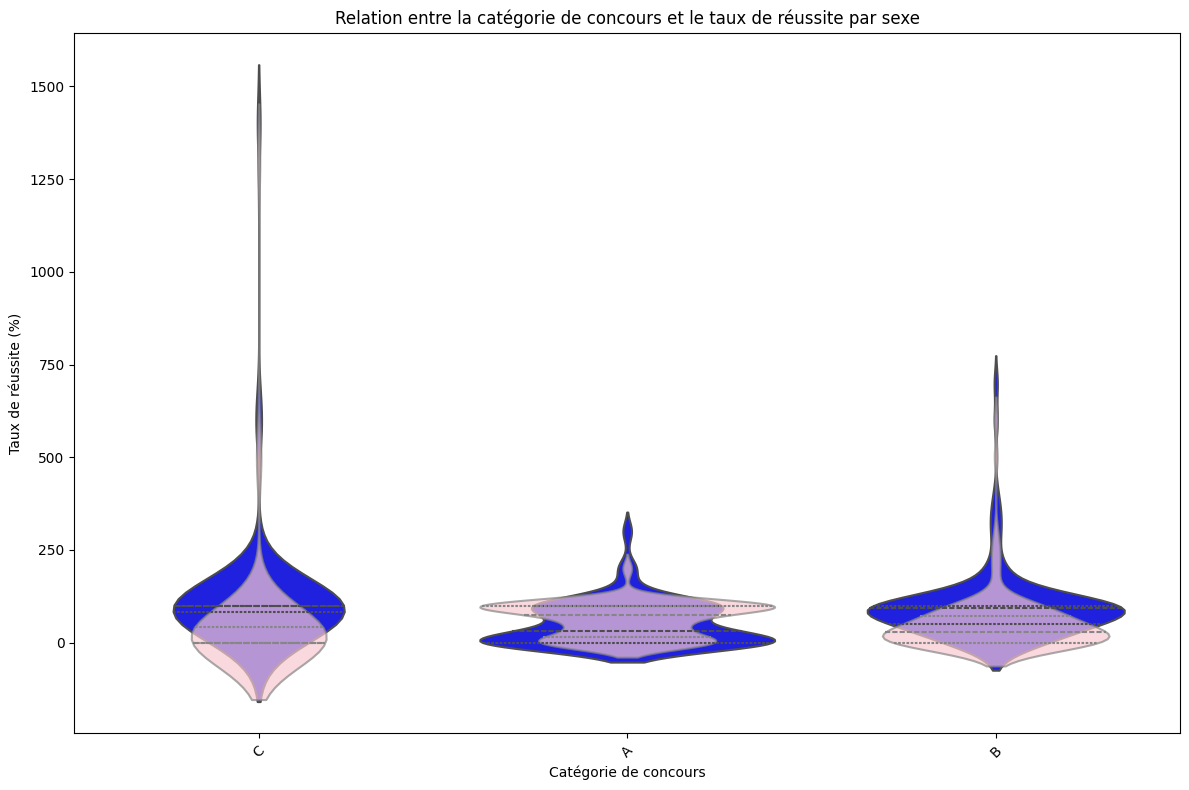

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='categorie', y='taux_de_reussite_hommes', data=df, color='blue', inner="quartile", linewidth=1.5)
sns.violinplot(x='categorie', y='taux_de_reussite_femmes', data=df, color='pink', inner="quartile", linewidth=1.5, alpha=0.7)

plt.title('Relation entre la catégorie de concours et le taux de réussite par sexe')
plt.xlabel('Catégorie de concours')
plt.ylabel('Taux de réussite (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




*  Les taux de réussite pour les trois catégories varient considérablement, la catégorie C ayant le taux de réussite médian le plus élevé (80 %) et la catégorie A le plus bas (60 %).
*  Il y a une séparation claire entre les catégories, la catégorie C ayant un taux de réussite médian nettement plus élevé que les catégories A et B








**5-Impact du Nombre de Postes Disponibles**

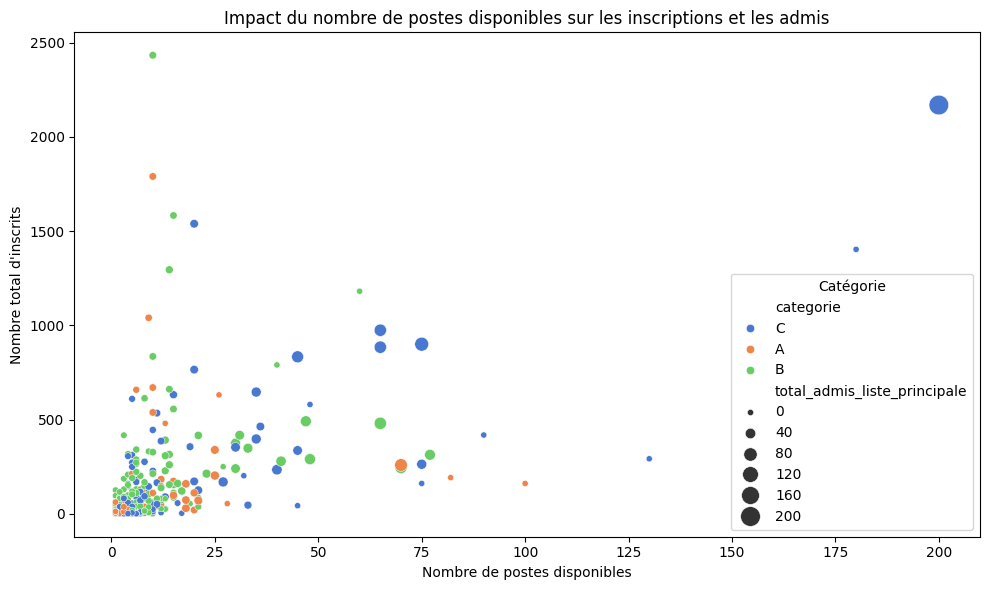

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='nombre_de_postes', y='total_inscrits', hue='categorie', size='total_admis_liste_principale', sizes=(20, 200), data=df)
plt.title('Impact du nombre de postes disponibles sur les inscriptions et les admis')
plt.xlabel('Nombre de postes disponibles')
plt.ylabel('Nombre total d\'inscrits')
plt.legend(title='Catégorie')
plt.tight_layout()
plt.show()




*  On observe une légère tendance à l'augmentation du nombre d'inscriptions et du nombre d'admis lorsque le nombre de postes disponibles augmente.
*   Il semble que la catégorie C soit légèrement plus sensible au nombre de postes disponibles que les catégories B et A.
*     Pour la catégorie A, on observe une légère augmentation du nombre d'inscriptions et du nombre d'admis lorsque le nombre de postes disponibles augmente. Cependant, cette augmentation est très variable et ne se manifeste pas clairement dans le nuage de points.
*   Pour la catégorie B, l'augmentation du nombre d'inscriptions et du nombre d'admis est encore moins visible que pour la catégorie C. Les points de la catégorie B sont dispersés de manière relativement uniforme dans le nuage de points.






**6-1/Répartition des postes disponibles par catégorie de concours**



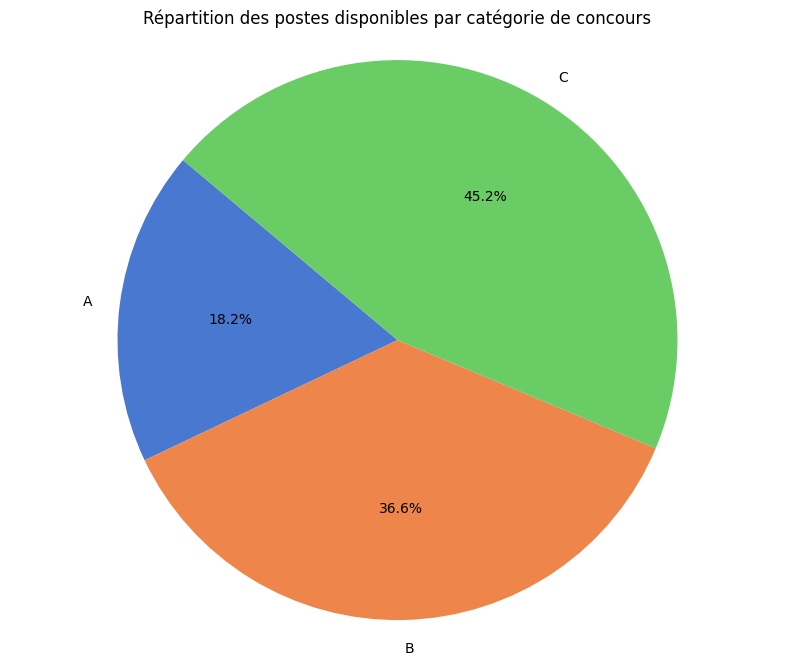

In [ ]:
total_postes_par_categorie = df.groupby('categorie')['nombre_de_postes'].sum()
plt.figure(figsize=(10, 8))
plt.pie(total_postes_par_categorie, labels=total_postes_par_categorie.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des postes disponibles par catégorie de concours')
plt.axis('equal')
plt.show()


**6-2/Répartition des postes disponibles par catégorie /collectivite**


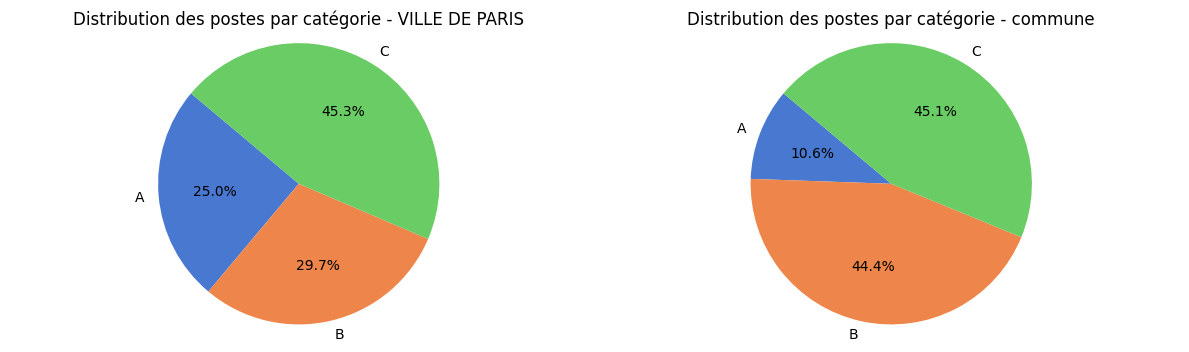

In [ ]:
grouped_data = df.groupby(['collectivite', 'categorie'])['nombre_de_postes'].sum().reset_index()
plt.figure(figsize=(12, 10))

for i, collectivite in enumerate(grouped_data['collectivite'].unique(), 1):
    plt.subplot(3, 2, i)
    data_collectivite = grouped_data[grouped_data['collectivite'] == collectivite]
    labels = data_collectivite['categorie']
    sizes = data_collectivite['nombre_de_postes']
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution des postes par catégorie - {collectivite}')
    plt.axis('equal')

plt.tight_layout()
plt.show()



*   En général, les postes disponibles sont répartis comme suit : catégorie C > catégorie B  catégorie A.

*   Au niveau des communes, la catégorie B devenait aussi  importante avec un pourc
*   Pour la ville de Paris, les pourcentages des catégories B et C sont presque similaires, avec une légère différence en faveur de la catégorie B (29.2% contre 25%). Cela signifie que la répartition des postes disponibles à Paris est plus équilibrée entre les catégories B et C.



**7-Taux de réussite par collectivité et par sexe**

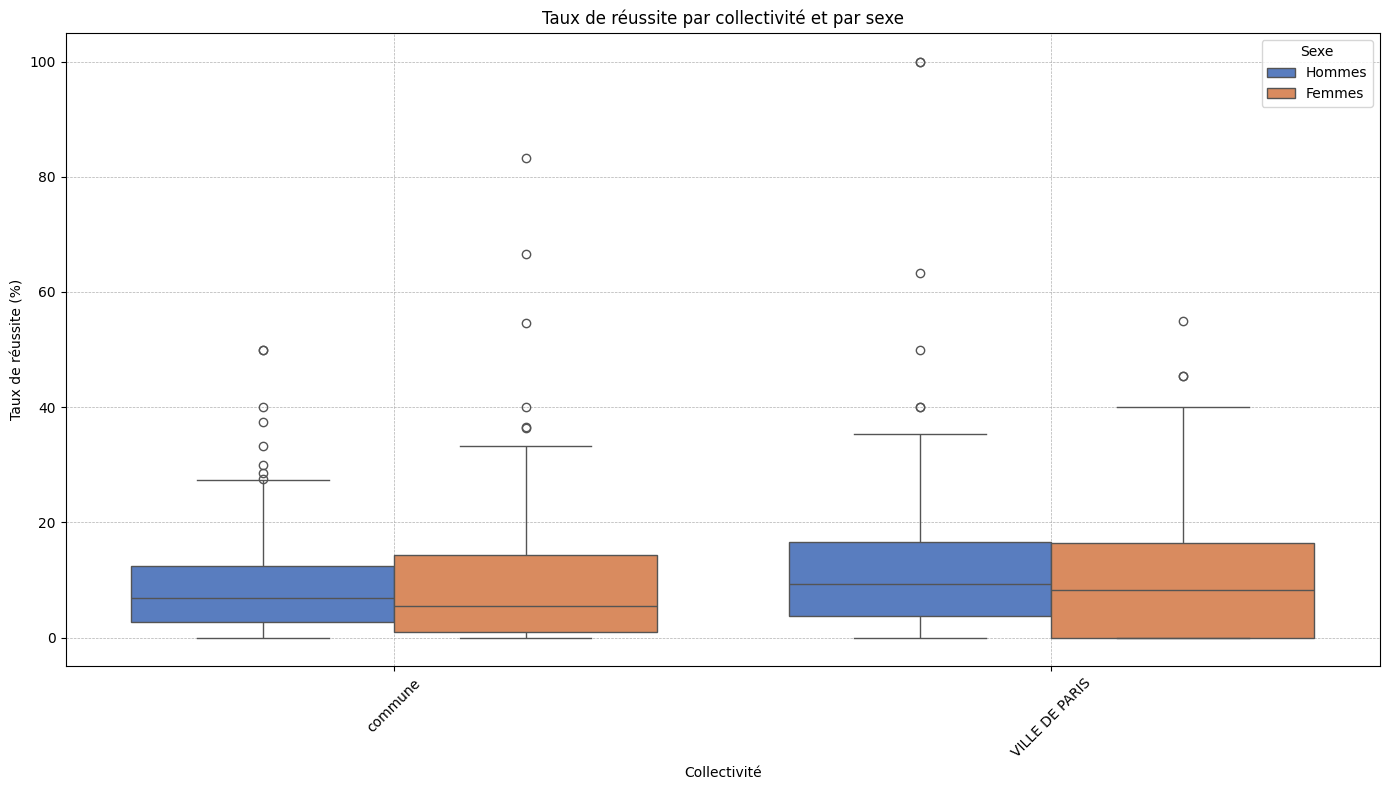

In [ ]:

df['taux_reussite_hommes'] = ((df['admis_liste_principale_hommes'] + df['admis_liste_complementaire_hommes']) / df['inscrits_hommes']) * 100
df['taux_reussite_femmes'] = ((df['admis_liste_principale_femmes'] + df['admis_liste_complementaire_femmes']) / df['inscrits_femmes']) * 100

df_long = pd.melt(df, id_vars=['collectivite'],
                  value_vars=['taux_reussite_hommes', 'taux_reussite_femmes'],
                  var_name='sexe',
                  value_name='taux_reussite')
df_long['sexe'] = df_long['sexe'].replace({'taux_reussite_hommes': 'Hommes', 'taux_reussite_femmes': 'Femmes'})

plt.figure(figsize=(14, 8))
sns.boxplot(x='collectivite', y='taux_reussite', hue='sexe', data=df_long)

plt.title('Taux de réussite par collectivité et par sexe')
plt.xlabel('Collectivité')
plt.ylabel('Taux de réussite (%)')
plt.xticks(rotation=45)
plt.legend(title='Sexe')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()




*  Le taux de réussite est plus élevé à la Ville de Paris.
*  le taux de réussite des femmes est plus élevé pour les deux collectivités

**8-Distribution des taux de réussite par collectivité et par sexe**

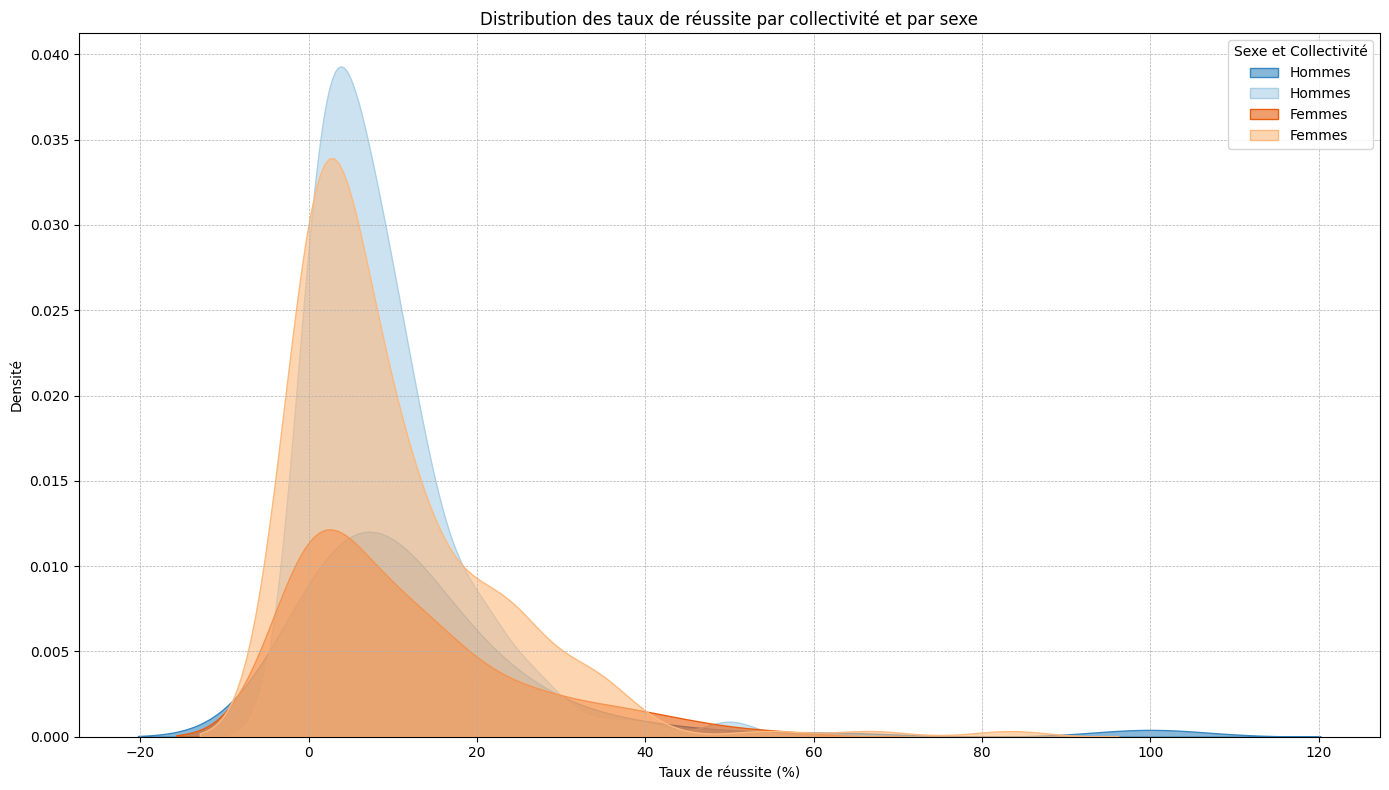

In [ ]:

df['taux_reussite_hommes'] = ((df['admis_liste_principale_hommes'] + df['admis_liste_complementaire_hommes']) / df['inscrits_hommes']) * 100
df['taux_reussite_femmes'] = ((df['admis_liste_principale_femmes'] + df['admis_liste_complementaire_femmes']) / df['inscrits_femmes']) * 100
plt.figure(figsize=(14, 8))
sns.kdeplot(data=df, x='taux_reussite_hommes', hue='collectivite', fill=True, palette="Blues", alpha=0.6, label="Hommes")
sns.kdeplot(data=df, x='taux_reussite_femmes', hue='collectivite', fill=True, palette="Oranges", alpha=0.6, label="Femmes")

plt.title('Distribution des taux de réussite par collectivité et par sexe')
plt.xlabel('Taux de réussite (%)')
plt.ylabel('Densité')
plt.legend(title='Sexe et Collectivité')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Le taux de réussite en fonction du sexe est plus faible en ville de Paris








**9-Matrice de corrélation des variables quantitatives**

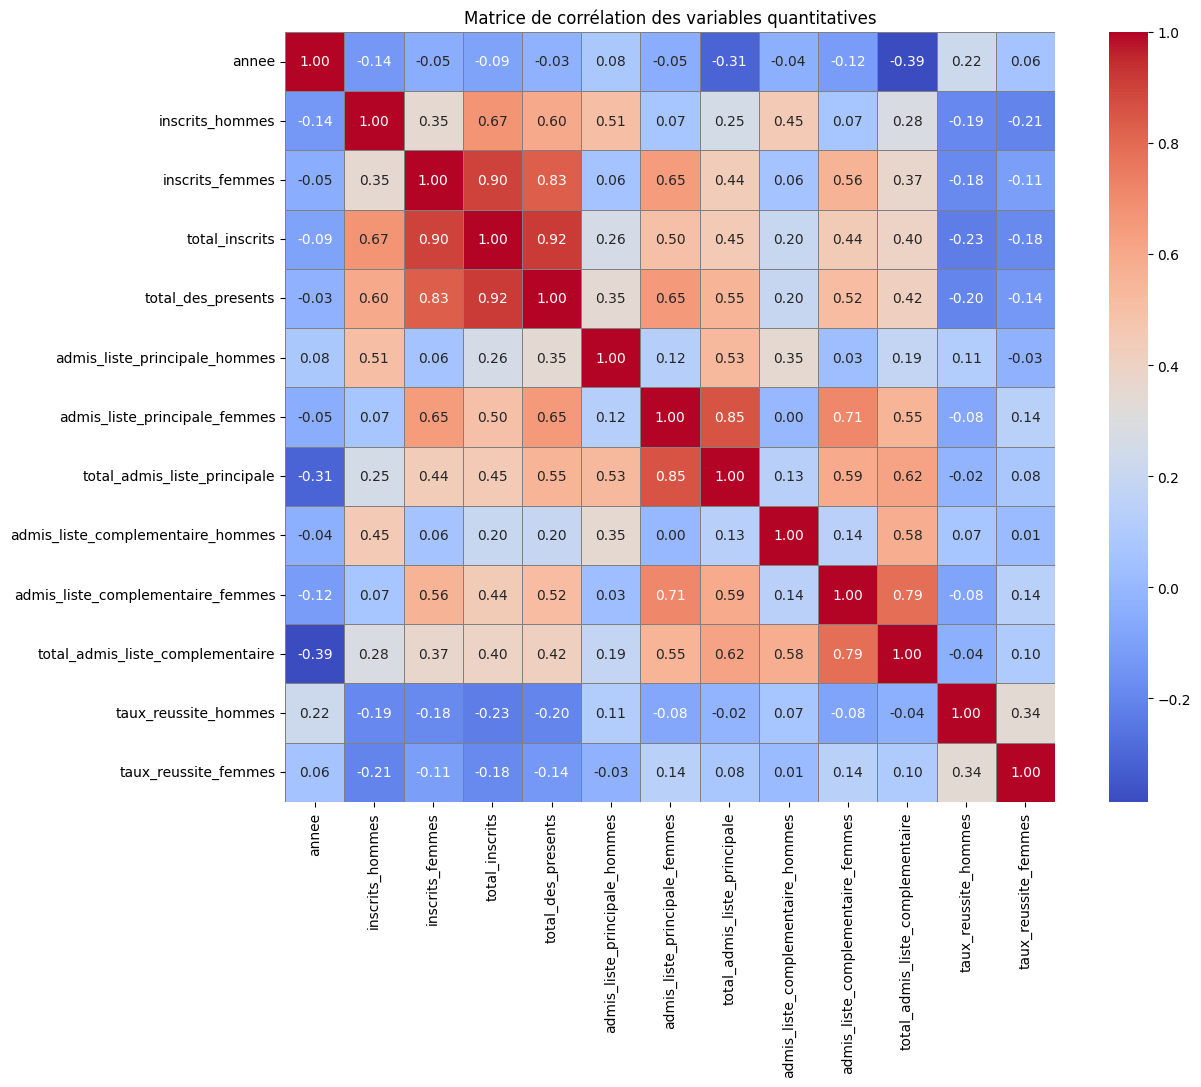

In [ ]:

df['taux_reussite_hommes'] = ((df['admis_liste_principale_hommes'] + df['admis_liste_complementaire_hommes']) / df['inscrits_hommes']) * 100
df['taux_reussite_femmes'] = ((df['admis_liste_principale_femmes'] + df['admis_liste_complementaire_femmes']) / df['inscrits_femmes']) * 100

cols_to_include = ['annee',
    'inscrits_hommes',
    'inscrits_femmes',
    'total_inscrits',
    'total_des_presents',
    'admis_liste_principale_hommes',
    'admis_liste_principale_femmes',
    'total_admis_liste_principale',
    'admis_liste_complementaire_hommes',
    'admis_liste_complementaire_femmes',
    'total_admis_liste_complementaire',
    'taux_reussite_hommes',
    'taux_reussite_femmes'
]

df_corr = df[cols_to_include]
corr_matrix = df_corr.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5, linecolor='gray')
plt.title('Matrice de corrélation des variables quantitatives')
plt.show()


###**conclusion**
L'analyse des données montre des tendances claires concernant la participation, l'admission et le taux de réussite des concours de fonctionnaires à la Ville de Paris. Les femmes montrent généralement des performances comparables voire meilleures que les hommes en termes de taux de réussite. Cependant, il existe des disparités entre les différentes catégories de concours et les collectivités.